# Strategy and Performance Management
### Causal inference - Gamification Case - Group Pre-Assignment
Group 4 : Kirtesh Patel, Nils Marthiensen, Neelesh Bhalla, Chia-Jung Chang

https://github.com/nilsmart96/fs-spm-assignments/tree/main

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [231]:
# Import of the data
data_url = 'https://github.com/nilsmart96/fs-spm-assignments/blob/main/Causal_inference-Gamification_Case-Group_Pre-Assignment/Gamification_P2_data.xls?raw=true'
df = pd.read_excel(data_url)
df

,ID,TypeOfTraining,TotalKnowledge,Enjoyable,Interesting,Fun,Informative,Boring,WasteofTime
0,R_5szoKKcZFdngzjf,No Training,0.40909,NaN,NaN,NaN,NaN,NaN,NaN
1,R_eWEYtyLNHiiggCN,No Training,0.63636,NaN,NaN,NaN,NaN,NaN,NaN
2,R_292ukqmop2JopfL,No Training,0.52273,NaN,NaN,NaN,NaN,NaN,NaN
3,R_e9BMcGonFvRXC5v,No Training,0.56818,NaN,NaN,NaN,NaN,NaN,NaN
4,R_9XH5ZhzR4uhbuT3,No Training,0.31818,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
111,R_1RdlrYUwr7NrXGl,Gamified Training,0.56818,5.0,4.0,4.0,5.0,2.0,2.0
112,R_2f5cLI2iSlKmjg9,Gamified Training,0.40909,6.0,6.0,6.0,6.0,2.0,2.0
113,R_cMV49tCT5mXJlDT,Gamified Training,0.59091,6.0,6.0,6.0,6.0,2.0,2.0
114,R_0DnN5hhkU02wSyh,Gamified Training,0.52273,5.0,5.0,5.0,6.0,3.0,5.0


In [232]:
df.describe()

,TotalKnowledge,Enjoyable,Interesting,Fun,Informative,Boring,WasteofTime
count,116.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,0.507445,4.859155,5.309859,4.577465,6.084507,3.253521,2.478873
std,0.085919,1.323370,1.063573,1.327317,0.857679,1.421451,1.080465
min,0.181820,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000
25%,0.454550,4.000000,5.000000,4.000000,6.000000,2.000000,2.000000
50%,0.522730,5.000000,5.000000,5.000000,6.000000,3.000000,2.000000
75%,0.568180,6.000000,6.000000,6.000000,7.000000,4.000000,3.000000
max,0.636360,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000


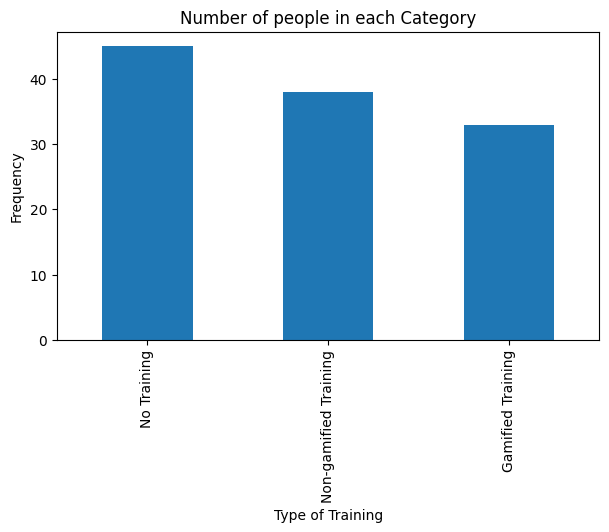

In [233]:
ax = df['TypeOfTraining'].value_counts().plot(kind='bar',
                                    figsize=(7,4),
                                    title="Number of people in each Category")
ax.set_xlabel("Type of Training")
ax.set_ylabel("Frequency")
plt.show()

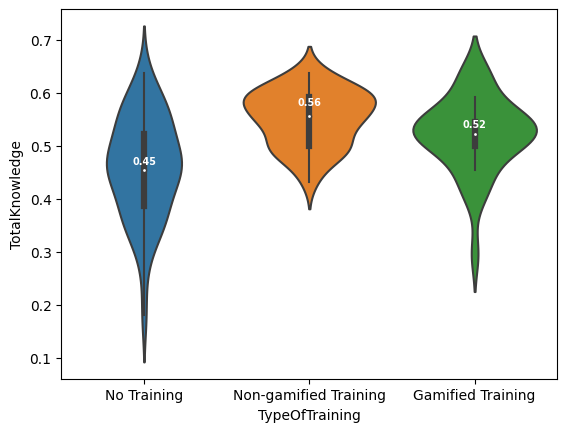

In [234]:
violin=sns.violinplot(data=df,y='TotalKnowledge',x='TypeOfTraining',showmeans=True,orient="v",order=['No Training','Non-gamified Training','Gamified Training'])
medians=round(df.groupby('TypeOfTraining')['TotalKnowledge'].median(),2)
medians=medians.reindex(index=['No Training','Non-gamified Training','Gamified Training'])
#print(medians)
vertical_offset = df['TotalKnowledge'].median() * 0.03

for xtick in violin.get_xticks():
    violin.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

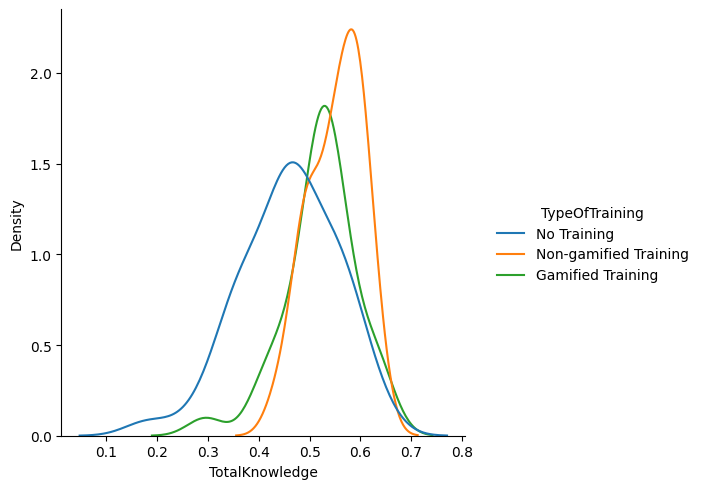

In [235]:
sns.displot(df, x="TotalKnowledge", hue="TypeOfTraining", kind="kde")

In [236]:
df.drop(['ID','TotalKnowledge'],inplace=True,axis=1)

In [237]:
df[['Enjoyable','Interesting','Fun','Informative','Boring','WasteofTime']]=df[['Enjoyable','Interesting','Fun','Informative','Boring','WasteofTime']].astype('string')
df

,TypeOfTraining,Enjoyable,Interesting,Fun,Informative,Boring,WasteofTime
0,No Training,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,No Training,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,No Training,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,No Training,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,No Training,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...
111,Gamified Training,5.0,4.0,4.0,5.0,2.0,2.0
112,Gamified Training,6.0,6.0,6.0,6.0,2.0,2.0
113,Gamified Training,6.0,6.0,6.0,6.0,2.0,2.0
114,Gamified Training,5.0,5.0,5.0,6.0,3.0,5.0


In [238]:
df=df[~(df['TypeOfTraining']=='No Training')]
df

,TypeOfTraining,Enjoyable,Interesting,Fun,Informative,Boring,WasteofTime
45,Non-gamified Training,6.0,6.0,4.0,6.0,5.0,2.0
46,Non-gamified Training,4.0,6.0,4.0,6.0,2.0,2.0
47,Non-gamified Training,6.0,6.0,6.0,7.0,2.0,2.0
48,Non-gamified Training,6.0,7.0,5.0,7.0,3.0,2.0
49,Non-gamified Training,6.0,7.0,6.0,7.0,1.0,2.0
...,...,...,...,...,...,...,...
111,Gamified Training,5.0,4.0,4.0,5.0,2.0,2.0
112,Gamified Training,6.0,6.0,6.0,6.0,2.0,2.0
113,Gamified Training,6.0,6.0,6.0,6.0,2.0,2.0
114,Gamified Training,5.0,5.0,5.0,6.0,3.0,5.0


In [239]:
df2=df.groupby('TypeOfTraining')['Enjoyable','Interesting','Fun','Informative','Boring','WasteofTime'].apply(lambda x: (x=='2.0').sum())
df3=df.groupby('TypeOfTraining')['Enjoyable','Interesting','Fun','Informative','Boring','WasteofTime'].apply(lambda x: (x=='3.0').sum())
df4=df.groupby('TypeOfTraining')['Enjoyable','Interesting','Fun','Informative','Boring','WasteofTime'].apply(lambda x: (x=='4.0').sum())
df5=df.groupby('TypeOfTraining')['Enjoyable','Interesting','Fun','Informative','Boring','WasteofTime'].apply(lambda x: (x=='5.0').sum())
df6=df.groupby('TypeOfTraining')['Enjoyable','Interesting','Fun','Informative','Boring','WasteofTime'].apply(lambda x: (x=='6.0').sum())
df7=df.groupby('TypeOfTraining')['Enjoyable','Interesting','Fun','Informative','Boring','WasteofTime'].apply(lambda x: (x=='7.0').sum())


C:\Users\hp\AppData\Local\Temp\ipykernel_19324\2518931567.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2=df.groupby('TypeOfTraining')['Enjoyable','Interesting','Fun','Informative','Boring','WasteofTime'].apply(lambda x: (x=='2.0').sum())
C:\Users\hp\AppData\Local\Temp\ipykernel_19324\2518931567.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3=df.groupby('TypeOfTraining')['Enjoyable','Interesting','Fun','Informative','Boring','WasteofTime'].apply(lambda x: (x=='3.0').sum())
C:\Users\hp\AppData\Local\Temp\ipykernel_19324\2518931567.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df4=df.groupby('TypeOfTraining')['Enjoyable','Interesting','Fun','Informative','Boring','WasteofTime'].apply(lambda x: (x=='4.0').sum())
C:\Users\hp\AppD

In [240]:
df_n=pd.DataFrame()
df_n['Score2']=df5['Enjoyable']
df_n['Score3']=df3['Enjoyable']
df_n

,Score2,Score3
TypeOfTraining,,
Gamified Training,7,2
Non-gamified Training,11,1


In [241]:
for i in list(df2.columns):
    print(i)
    df_name=pd.DataFrame()
    df_name['Score 2']=df2[f'{i}']
    df_name['Score 3']=df3[f'{i}']
    df_name['Score 4']=df4[f'{i}']
    df_name['Score 5']=df5[f'{i}']
    df_name['Score 6']=df6[f'{i}']
    df_name['Score 7']=df7[f'{i}']
    df_na = f'df_{i}'
    globals()[df_na] = df_name

Enjoyable
Interesting
Fun
Informative
Boring
WasteofTime


In [242]:
df_Fun.index

Index(['Gamified Training', 'Non-gamified Training'], dtype='object', name='TypeOfTraining')

<AxesSubplot:title={'center':'Fun Rating'}, xlabel='TypeOfTraining', ylabel='Number of People'>

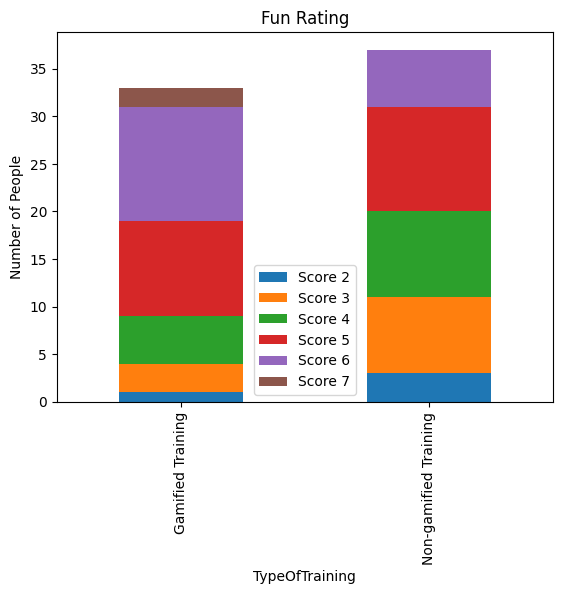

In [243]:
df_Fun.plot(kind = 'bar',stacked = True,title = 'Fun Rating',ylabel='Number of People')

<AxesSubplot:title={'center':'Enjoyable Rating'}, xlabel='TypeOfTraining', ylabel='Number of People'>

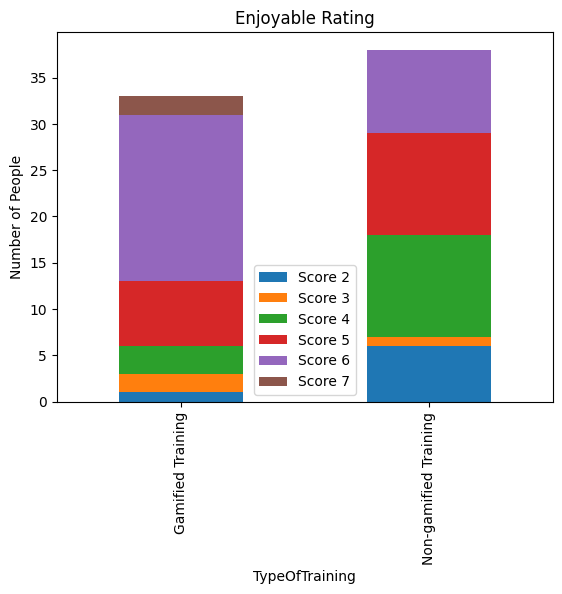

In [244]:
df_Enjoyable.plot(kind = 'bar',stacked = True,title = 'Enjoyable Rating',ylabel='Number of People')

<AxesSubplot:title={'center':'Interesting Rating'}, xlabel='TypeOfTraining', ylabel='Number of People'>

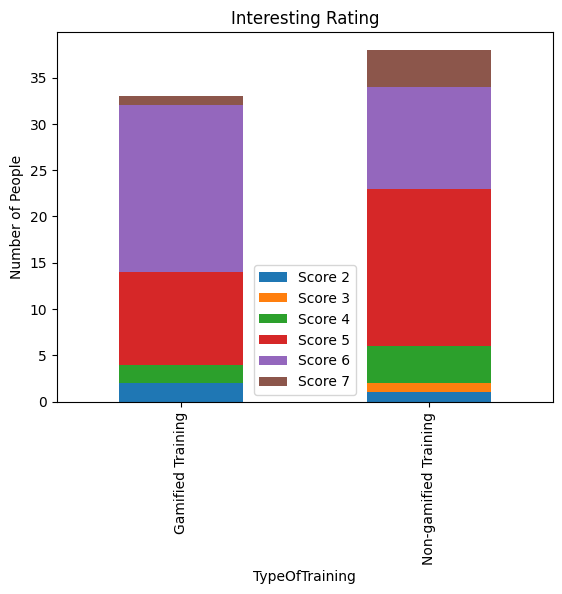

In [245]:
df_Interesting.plot(kind = 'bar',stacked = True,title = 'Interesting Rating',ylabel='Number of People')

<AxesSubplot:title={'center':'Informative Rating'}, xlabel='TypeOfTraining', ylabel='Number of People'>

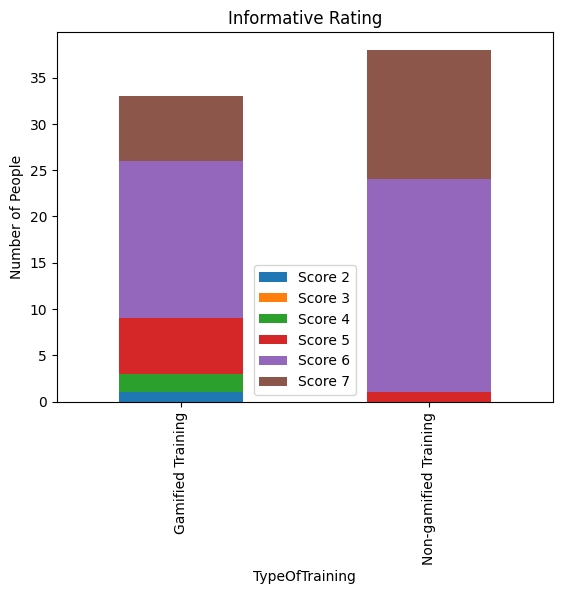

In [246]:
df_Informative.plot(kind = 'bar',stacked = True,title = 'Informative Rating',ylabel='Number of People')

<AxesSubplot:title={'center':'Waste of Time Rating'}, xlabel='TypeOfTraining', ylabel='Number of People'>

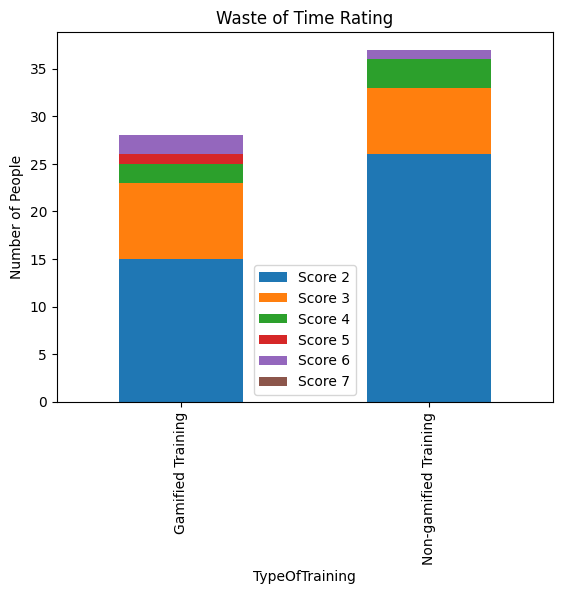

In [247]:
df_WasteofTime.plot(kind = 'bar',stacked = True,title = 'Waste of Time Rating',ylabel='Number of People')

<AxesSubplot:title={'center':'Boring Rating'}, xlabel='TypeOfTraining', ylabel='Number of People'>

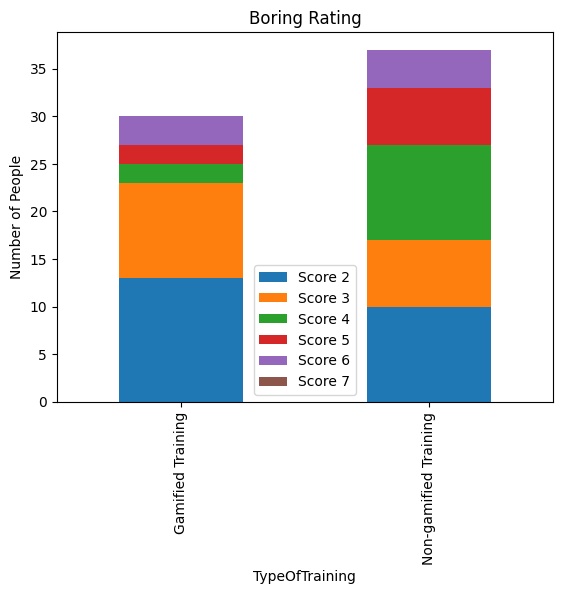

In [248]:
df_Boring.plot(kind = 'bar',stacked = True,title = 'Boring Rating',ylabel='Number of People')

In [249]:
df_Fun

,Score 2,Score 3,Score 4,Score 5,Score 6,Score 7
TypeOfTraining,,,,,,
Gamified Training,1,3,5,10,12,2
Non-gamified Training,3,8,9,11,6,0


In [250]:
df_Fun['Weighted Average']=(df_Fun['Score 2']*2+df_Fun['Score 3']*3+df_Fun['Score 4']*4+df_Fun['Score 5']*5+df_Fun['Score 6']*6+df_Fun['Score 7']*7) / (df_Fun['Score 2']+df_Fun['Score 3']+df_Fun['Score 4']+df_Fun['Score 5']+df_Fun['Score 6']+df_Fun['Score 7'])
df_Fun

,Score 2,Score 3,Score 4,Score 5,Score 6,Score 7,Weighted Average
TypeOfTraining,,,,,,,
Gamified Training,1,3,5,10,12,2,5.060606
Non-gamified Training,3,8,9,11,6,0,4.243243


In [251]:
df_Enjoyable['Weighted Average']=(df_Enjoyable['Score 2']*2+df_Enjoyable['Score 3']*3+df_Enjoyable['Score 4']*4+df_Enjoyable['Score 5']*5+df_Enjoyable['Score 6']*6+df_Enjoyable['Score 7']*7) / (df_Enjoyable['Score 2']+df_Enjoyable['Score 3']+df_Enjoyable['Score 4']+df_Enjoyable['Score 5']+df_Enjoyable['Score 6']+df_Enjoyable['Score 7'])
df_Enjoyable

,Score 2,Score 3,Score 4,Score 5,Score 6,Score 7,Weighted Average
TypeOfTraining,,,,,,,
Gamified Training,1,2,3,7,18,2,5.363636
Non-gamified Training,6,1,11,11,9,0,4.421053


In [252]:
df_Interesting['Weighted Average']=(df_Interesting['Score 2']*2+df_Interesting['Score 3']*3+df_Interesting['Score 4']*4+df_Interesting['Score 5']*5+df_Interesting['Score 6']*6+df_Interesting['Score 7']*7) / (df_Interesting['Score 2']+df_Interesting['Score 3']+df_Interesting['Score 4']+df_Interesting['Score 5']+df_Interesting['Score 6']+df_Interesting['Score 7'])
df_Interesting

,Score 2,Score 3,Score 4,Score 5,Score 6,Score 7,Weighted Average
TypeOfTraining,,,,,,,
Gamified Training,2,0,2,10,18,1,5.363636
Non-gamified Training,1,1,4,17,11,4,5.263158


In [253]:
df_Informative['Weighted Average']=(df_Informative['Score 2']*2+df_Informative['Score 3']*3+df_Informative['Score 4']*4+df_Informative['Score 5']*5+df_Informative['Score 6']*6+df_Informative['Score 7']*7) / (df_Informative['Score 2']+df_Informative['Score 3']+df_Informative['Score 4']+df_Informative['Score 5']+df_Informative['Score 6']+df_Informative['Score 7'])
df_Informative

,Score 2,Score 3,Score 4,Score 5,Score 6,Score 7,Weighted Average
TypeOfTraining,,,,,,,
Gamified Training,1,0,2,6,17,7,5.787879
Non-gamified Training,0,0,0,1,23,14,6.342105


In [254]:
df_WasteofTime['Weighted Average']=(df_WasteofTime['Score 2']*2+df_WasteofTime['Score 3']*3+df_WasteofTime['Score 4']*4+df_WasteofTime['Score 5']*5+df_WasteofTime['Score 6']*6+df_WasteofTime['Score 7']*7) / (df_WasteofTime['Score 2']+df_WasteofTime['Score 3']+df_WasteofTime['Score 4']+df_WasteofTime['Score 5']+df_WasteofTime['Score 6']+df_WasteofTime['Score 7'])
df_WasteofTime

,Score 2,Score 3,Score 4,Score 5,Score 6,Score 7,Weighted Average
TypeOfTraining,,,,,,,
Gamified Training,15,8,2,1,2,0,2.821429
Non-gamified Training,26,7,3,0,1,0,2.459459


In [255]:
df_Boring['Weighted Average']=(df_Boring['Score 2']*2+df_Boring['Score 3']*3+df_Boring['Score 4']*4+df_Boring['Score 5']*5+df_Boring['Score 6']*6+df_Boring['Score 7']*7) / (df_Boring['Score 2']+df_Boring['Score 3']+df_Boring['Score 4']+df_Boring['Score 5']+df_Boring['Score 6']+df_Boring['Score 7'])
df_Boring

,Score 2,Score 3,Score 4,Score 5,Score 6,Score 7,Weighted Average
TypeOfTraining,,,,,,,
Gamified Training,13,10,2,2,3,0,3.066667
Non-gamified Training,10,7,10,6,4,0,3.648649


In [256]:
df_wa=pd.DataFrame()
df_wa['Fun']=df_Fun['Weighted Average']
df_wa['Enjoyable']=df_Enjoyable['Weighted Average']
df_wa['Interesting']=df_Interesting['Weighted Average']
df_wa['Informativ']=df_Informative['Weighted Average']
df_wa['WasteofTime']=df_WasteofTime['Weighted Average']
df_wa['Boring']=df_Boring['Weighted Average']
df_wa

,Fun,Enjoyable,Interesting,Informativ,WasteofTime,Boring
TypeOfTraining,,,,,,
Gamified Training,5.060606,5.363636,5.363636,5.787879,2.821429,3.066667
Non-gamified Training,4.243243,4.421053,5.263158,6.342105,2.459459,3.648649
